In [1]:
%pylab inline
import pandas as pd
import dask.dataframe as dd
import os,sys
import logging
import fastparquet
import gc
import cPickle as pickle 

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0,"../python/")

### A

In [3]:
import zillow.features  as features
from zillow import config
reload (features)

<module 'zillow.features' from '../python/zillow/features.pyc'>

In [268]:
year=2016
state='37'

In [269]:
df=features.get_features(['longi_lati'],state,year)

In [270]:
df.head()

longitude   latitude
parcelid                      
96031615 -80.891602  35.457161
96031624 -80.896919  35.460495
96031841 -80.917786  35.481075
96032054 -80.895370  35.481533
96032089 -80.899300  35.479393

In [271]:
data=df.loc[np.random.permutation(df.index)][:20000].values.T

In [272]:
data.shape

(2, 20000)

In [273]:
df.shape

(2932874, 2)

In [274]:
values.shape

(2, 2000)

In [275]:
kernel = stats.gaussian_kde(data)


In [276]:
xmin = data[0].min()
xmax = data[0].max()
ymin = data[1].min()
ymax = data[1].max()

In [277]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)

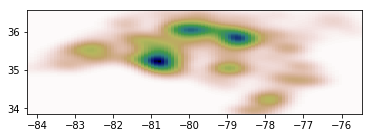

In [278]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
#ax.plot(data[0], data[1], 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [279]:
Z.max()

0.44582970294560276

In [280]:
Z.min()

1.2094523511982153e-30

In [281]:
        from scipy.spatial import cKDTree

In [282]:
tree = cKDTree(df.values)


In [283]:
data=df.loc[np.random.permutation(df.index)][:200].values.T

In [284]:
data.shape

(2, 200)

In [285]:
df.head()

longitude   latitude
parcelid                      
96031615 -80.891602  35.457161
96031624 -80.896919  35.460495
96031841 -80.917786  35.481075
96032054 -80.895370  35.481533
96032089 -80.899300  35.479393

In [286]:
a=tree.query_ball_point(data.T,0.01/10,p=1)

In [287]:
b=np.log(np.array([len(u) for u in a]))
print b.max()
b=b/np.max(b)

4.653960350157523


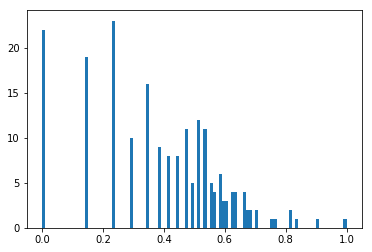

In [288]:
plt.hist(b,bins=100);


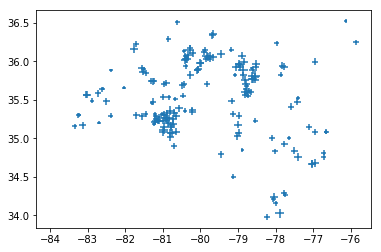

In [289]:
 plt.scatter(data[0] , data[1] ,s=b*100,marker='+')

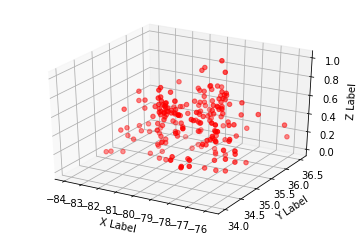

In [290]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
c, m, zlow, zhigh = ('r', 'o', -50, -25)

ax.scatter(data[0], data[1], b, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
